# Practical example 

### Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
sns.set()

### Load Data 

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
data.sample(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
316,Mitsubishi,17900.0,crossover,140,3.8,Gas,yes,2007,Pajero Wagon
696,Mitsubishi,5900.0,sedan,142,1.6,Gas,yes,2005,Lancer
2639,BMW,17800.0,crossover,265,3.0,Diesel,yes,2005,X5
1948,Audi,28950.0,crossover,60,2.0,Petrol,yes,2012,Q5
4156,Toyota,28500.0,sedan,16,2.5,Petrol,yes,2015,Camry


### Explore the descriptive statistics of the Variables

In [4]:
data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Preprocessing

### Determine the variables of interest 

In [5]:
data = data.drop(['Model'], axis= 1)

In [6]:
data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003


### Dealing with missing Values 

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Drop all rows with missing values in price and EngineV

In [8]:
data_no_mv = data.dropna(axis= 0)

In [9]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

> Now Data is cleaned 

### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Count'>

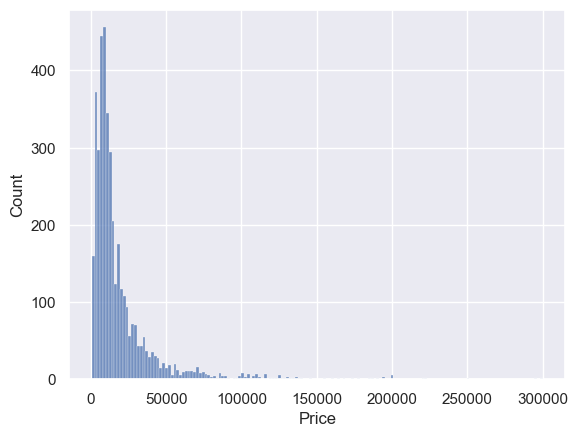

In [10]:
sns.histplot(data_no_mv['Price'])

### Dealing with Outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)

In [12]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

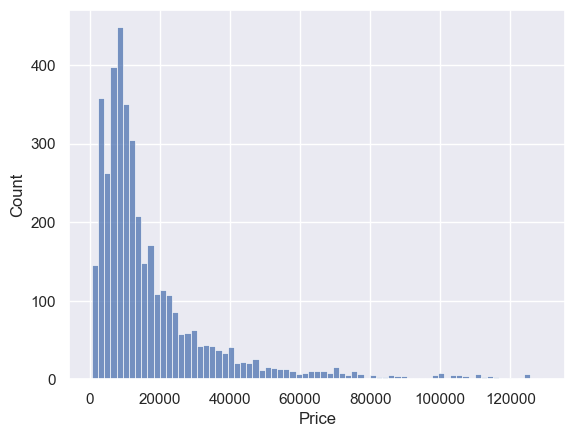

In [13]:
sns.histplot(data_1['Price'])

> we will make it also with Mileage , EngineV and Year 

 **First with Mileage**

<Axes: xlabel='Mileage', ylabel='Count'>

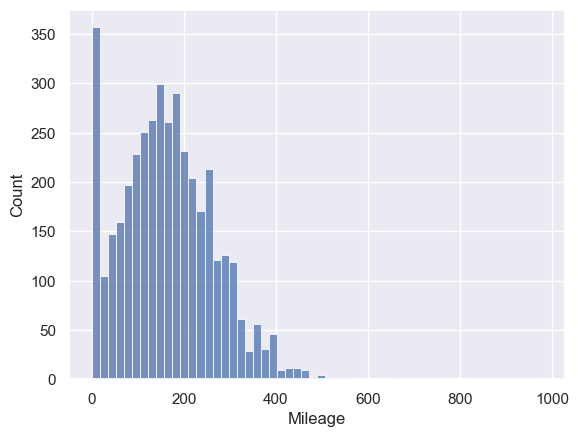

In [14]:
sns.histplot(data_no_mv['Mileage'])

In [15]:
q_mileage = data_1['Mileage'].quantile(.99)

In [16]:
data_2 = data_1[data_1['Mileage']<q_mileage]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


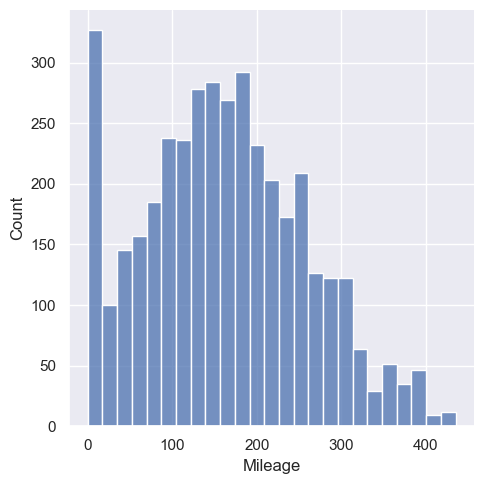

In [17]:
sns.displot(data_2['Mileage'])

**Second With EngineV**

<Axes: xlabel='EngineV', ylabel='Count'>

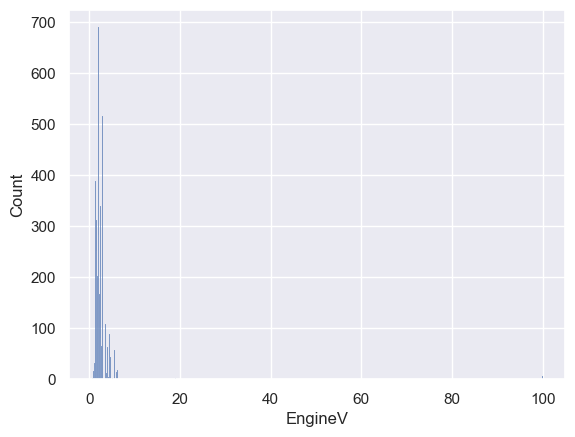

In [18]:
sns.histplot(data_no_mv["EngineV"])

In [19]:
q_EngV= data_no_mv['EngineV'].quantile(.99)
data_3 = data_2[data_2['EngineV']<q_EngV]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


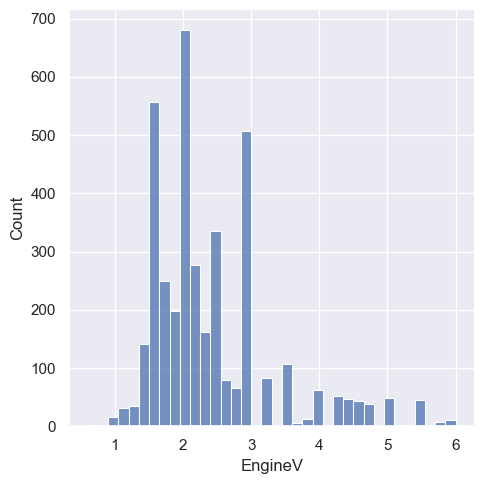

In [20]:
sns.displot(data_3['EngineV'])

**Third With Year**

In [21]:
q_year = data_no_mv['Year'].quantile(.01)
data_4 = data_3[data_3['Year']>q_year]

/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


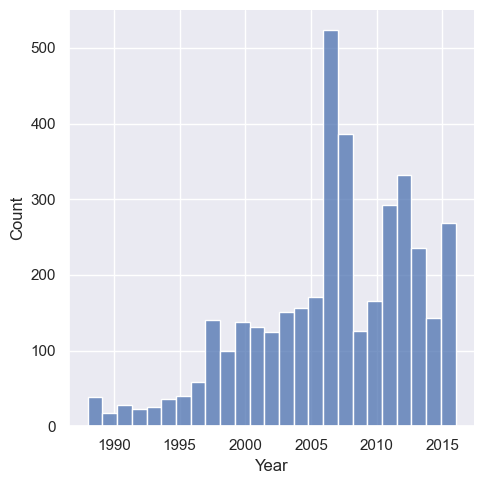

In [22]:
sns.displot(data_4['Year'])

In [23]:
data_cleaned = data_4.reset_index(drop=True)

In [24]:
data_cleaned.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3851,3851.00000,3851,3851.000000,3851.000000,3851,3851,3851.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1458,NaN,NaN,1807,3489,NaN
mean,NaN,18076.98263,NaN,160.837445,2.434524,NaN,NaN,2006.699039
std,NaN,19004.80061,NaN,95.680787,0.918583,NaN,NaN,6.112839
min,NaN,800.00000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.00000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.00000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.00000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


### Checking The OLS assumptions

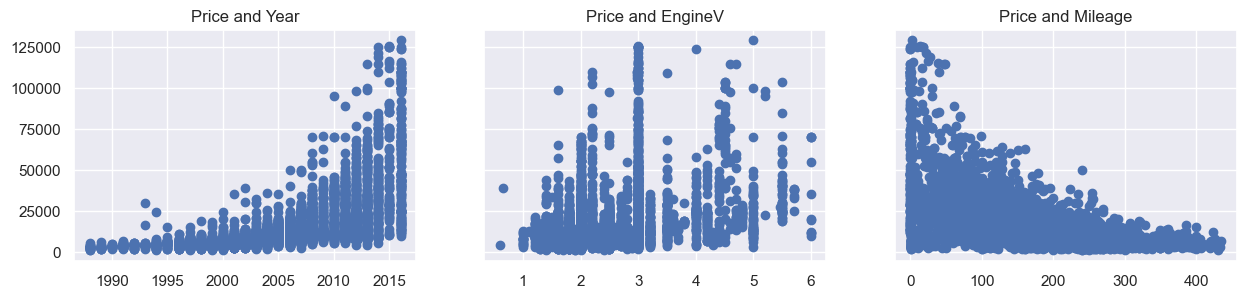

In [25]:
# first we Will check linearality for scatter plot 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

### Relaxing The assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [29]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3846,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3847,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3848,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3849,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()